In [31]:
import numpy as np
import pandas as pd

df= pd.read_csv(r'C:\Users\User\Desktop\Stats Course\Groupwork\suicide-rates-overview-1985-to-2016\master.csv')
df = pd.DataFrame(df, columns= ['country','year','sex','age','suicides_no','population','suicides/100k pop','country-year','HDI for year','generation'])

bad_countries = ['Dominica','Grenada','Jamaica','Kiribati','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and Grenadines','San Marino','Seychelles','Albania','Antigua and Barbuda','Armenia','Aruba','Azerbaijan','Bahamas','Bahrain','Barbados','Belize','Bulgaria','Costa Rica','Cyprus','Macau','Maldives','Malta','Mongolia','Monte Negro','Nicaragua','Oman']
years = [2016]

master_good = df[~(df['country'].isin(bad_countries)|df['year'].isin(years))] 

master_good

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,generation
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,G.I. Generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,Silent
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,G.I. Generation
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,Generation Z


In [32]:
master = pd.read_csv(r'C:\Users\User\Desktop\Stats Course\Groupwork\suicide-rates-overview-1985-to-2016\master.csv')
master

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [4]:
bad_countries = ['Dominica','Grenada','Jamaica','Kiribati','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and Grenadines','San Marino',
'Seychelles','Albania','Antigua and Barbuda','Armenia','Aruba','Azerbaijan','Bahamas','Bahrain','Barbados','Belize','Bulgaria',
'Costa Rica','Cyprus','Macau','Maldives','Malta','Mongolia','Montenegro','Nicaragua','Oman']

master_good = master[~master['country'].isin(bad_countries)]

len(bad_countries)

28

In [5]:
master_good.country.describe()

count           22188
unique             73
top       Netherlands
freq              382
Name: country, dtype: object

In [7]:
year_summary=master_good.groupby('year').agg(tot_suicide=('suicides_no','sum')).sort_values \
                                    (by='year',ascending=True).reset_index()
year_summary.head()

,year,tot_suicide
0,1985,114439
1,1986,119112
2,1987,125108
3,1988,119319
4,1989,158497


In [73]:
age_against_suicides = master_good[['age','suicides_no','population','suicides/100k pop']]
age_against_suicides.head()

,age,suicides_no,population,suicides/100k pop
588,75+ years,202,363000,55.65
589,55-74 years,485,1997000,24.29
590,35-54 years,414,3346300,12.37
591,55-74 years,210,2304000,9.11
592,25-34 years,177,2234200,7.92


In [74]:
age_summary=master_good.groupby('age').agg(tot_suicide=('suicides/100k pop','sum')).sort_values(by='tot_suicide',ascending=False).reset_index()
age_summary

,age,tot_suicide
0,75+ years,102029.29
1,55-74 years,68982.57
2,35-54 years,63378.72
3,25-34 years,51420.57
4,15-24 years,37918.40
5,5-14 years,2508.36


In [75]:
generation_summary=master_good.groupby('generation').agg(tot_suicide=('suicides/100k pop','sum')).sort_values(by='tot_suicide',ascending=False).reset_index()
generation_summary

,generation,tot_suicide
0,Silent,108022.82
1,Boomers,67316.03
2,Generation X,61566.23
3,G.I. Generation,60188.96
4,Millenials,28315.25
5,Generation Z,828.62


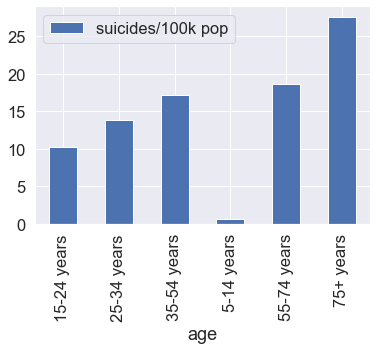

In [37]:
pivot_suicide=master_good.pivot_table(index=['age'],values=['suicides/100k pop'])

pivot_suicide.plot(kind='bar')

In [65]:
pivot_generation=master_good.pivot_table(index=['country','year', 'generation', 'age'],values=['suicides/100k pop','population'], aggfunc={'suicides/100k pop':sum,'population':sum})

pivot_generation

population  suicides/100k pop
country    year generation      age                                       
Argentina  1985 Boomers         25-34 years     4419400              10.89
                G.I. Generation 55-74 years     4301000              33.40
                                75+ years        900000              63.29
                Generation X    15-24 years     4769400               9.39
                                5-14 years      5999400               0.90
...                                                 ...                ...
Uzbekistan 2014 Generation X    35-54 years     7042133              18.13
                Generation Z    5-14 years      5393758               3.84
                Millenials      15-24 years     6119722              22.69
                                25-34 years     5474388              17.53
                Silent          75+ years        573460              10.14

[11094 rows x 2 columns]

In [72]:
age_against_suicides = master_good[['age','suicides_no','suicides/100k pop']]
age_against_suicides.head()

,age,suicides_no,suicides/100k pop
588,75+ years,202,55.65
589,55-74 years,485,24.29
590,35-54 years,414,12.37
591,55-74 years,210,9.11
592,25-34 years,177,7.92


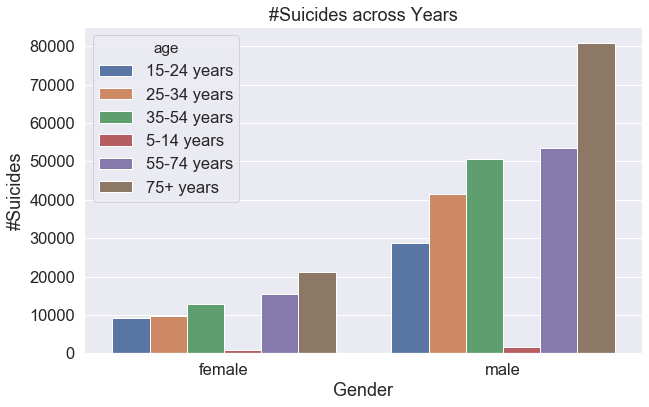

In [63]:
gender_age_summary=master_good.groupby(['sex','age']).agg(tot_suicide=('suicides/100k pop','sum')).reset_index()
gender_age_summary.head()

fig, ax = plt.subplots(figsize=(10,6));
plt.title('#Suicides across Years')
ax=sns.barplot(x=gender_age_summary['sex'],y=gender_age_summary['tot_suicide'],hue=gender_age_summary['age']);
ax.set(xlabel='Gender', ylabel='#Suicides');
plt.show()

In [77]:
gender_age_summary1=master_good.groupby(['age', 'year']).agg(tot_suicide=('suicides/100k pop','sum')).unstack()
gender_age_summary1.tail()

tot_suicide                                                        \
year               1985     1986     1987     1988     1989     1990     1991   
age                                                                             
25-34 years      897.57   936.83  1044.80  1083.80  1132.82  1469.82  1465.44   
35-54 years     1027.73   989.10  1178.24  1179.36  1290.49  1628.65  1732.15   
5-14 years        48.58    37.53    43.90    36.32    53.18    63.06    69.46   
55-74 years     1289.57  1263.23  1465.67  1391.20  1486.31  1861.92  1938.07   
75+ years       2138.34  2106.98  2312.96  2245.49  2482.37  3029.31  3171.93   

                                        ...                             \
year            1992     1993     1994  ...     2006     2007     2008   
age                                     ...                              
25-34 years  1554.10  1539.49  1578.91  ...  1696.49  1834.35  1795.07   
35-54 years  1844.56  1889.35  1936.94  ...  2179.07  2175.94  2276.53   
5-14 years     73.51    69.20    65.69  ...    89.57   103.97    96.32   
55-74 years  2037.39  2027.03  2152.86  ...  2340.01  2340.52  2422.92   
75+ years    3122.51  3188.27  3397.32  ...  3417.23  3642.56  3505.04   

                                                                            
year            2009     2010     2011     2012     2013     2014     2015  
age                                                                         
25-34 years  1796.33  1727.43  1670.63  1600.78  1572.27  1511.90  1148.66  
35-54 years  2338.84  2178.42  2080.99  2023.81  1978.89  1842.19  1462.05  
5-14 years    102.20    97.14    97.38    91.83    88.27    84.81    66.70  
55-74 years  2437.27  2248.56  2146.08  2160.40  2103.25  2000.76  1683.16  
75+ years    3399.30  3389.88  3165.36  3202.88  2935.91  2985.17  2518.77  

[5 rows x 31 columns]

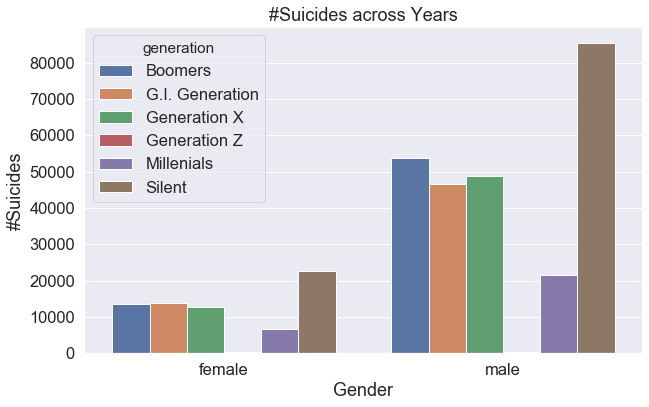

tot_suicide                              \
year                                    1985   1986   1987   1988   1989   
country   sex    generation                                                
Argentina female Boomers                2.97   4.37   4.00   2.74   3.71   
                 G.I. Generation       16.75  17.56  19.96  19.79  18.67   
                 Generation X           3.30   4.51   4.35   4.46   3.54   
                 Generation Z            NaN    NaN    NaN    NaN    NaN   
                 Millenials              NaN    NaN    NaN    NaN    NaN   

                                                                 ...        \
year                               1990  1991  1992  1993  1994  ...  2006   
country   sex    generation                                      ...         
Argentina female Boomers           3.38  6.93  7.12  7.01  7.16  ...  3.52   
                 G.I. Generation  17.16  7.60  6.78  8.30  4.72  ...   NaN   
                 Generation X      3.98  2.27  2.84  2.54  3.30  ...  3.42   
                 Generation Z       NaN   NaN   NaN   NaN   NaN  ...   NaN   
                 Millenials         NaN  0.27  0.40  0.49  0.34  ...  6.11   

                                                                            \
year                              2007  2008  2009  2010  2011  2012  2013   
country   sex    generation                                                  
Argentina female Boomers          3.37  3.71  3.17   NaN  2.85  3.24  3.01   
                 G.I. Generation   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
                 Generation X     4.04  2.97  3.29  6.52  3.21  3.28  3.08   
                 Generation Z     1.00  0.58  0.82  0.58  0.84  0.49  0.91   
                 Millenials       4.43  5.42  4.91  4.47  8.26  9.19  8.09   

                                              
year                              2014  2015  
country   sex    generation                   
Argentina female Boomers          3.15  3.55  
                 G.I. Generation   NaN   NaN  
                 Generation X     3.77  3.13  
                 Generation Z     0.99  0.54  
                 Millenials       9.68  8.03  

[5 rows x 31 columns]

In [61]:
generation_summary=master_good.groupby(['sex','generation']).agg(tot_suicide=('suicides/100k pop','sum')).reset_index()
generation_summary.head()
fig, ax = plt.subplots(figsize=(10,6));
plt.title('#Suicides across Years')
ax=sns.barplot(x=generation_summary['sex'],y=generation_summary['tot_suicide'],hue=generation_summary['generation']);
ax.set(xlabel='Gender', ylabel='#Suicides');
plt.show()
generation_summary1=master_good.groupby(['country','sex','generation','year']).agg(tot_suicide=('suicides/100k pop','sum')).unstack()
generation_summary1.head()

In [78]:
generation_summary1=master_good.groupby(['country','sex','generation','year']).agg(tot_suicide=('suicides_no','sum')).unstack()
generation_summary1.head(40)

tot_suicide                              \
year                                    1985   1986   1987   1988   1989   
country   sex    generation                                                
Argentina female Boomers                65.0   96.0   89.0   61.0   83.0   
                 G.I. Generation       251.0  249.0  281.0  294.0  266.0   
                 Generation X           80.0  108.0  107.0  112.0   91.0   
                 Generation Z            NaN    NaN    NaN    NaN    NaN   
                 Millenials              NaN    NaN    NaN    NaN    NaN   
                 Silent                142.0  188.0  209.0  198.0  166.0   
          male   Boomers               177.0  209.0  192.0  215.0  219.0   
                 G.I. Generation       687.0  760.0  732.0  766.0  756.0   
                 Generation X          172.0  196.0  194.0  231.0  204.0   
                 Generation Z            NaN    NaN    NaN    NaN    NaN   
                 Millenials              NaN    NaN    NaN    NaN    NaN   
                 Silent                414.0  478.0  482.0  477.0  462.0   
Australia female Boomers                64.0   88.0   70.0  106.0   87.0   
                 G.I. Generation       145.0  128.0  148.0  143.0  155.0   
                 Generation X           73.0   78.0   74.0   54.0   52.0   
                 Generation Z            NaN    NaN    NaN    NaN    NaN   
                 Millenials              NaN    NaN    NaN    NaN    NaN   
                 Silent                143.0  169.0  145.0  157.0  130.0   
          male   Boomers               357.0  367.0  374.0  398.0  406.0   
                 G.I. Generation       349.0  413.0  439.0  410.0  400.0   
                 Generation X          319.0  314.0  360.0  372.0  361.0   
                 Generation Z            NaN    NaN    NaN    NaN    NaN   
                 Millenials              NaN    NaN    NaN    NaN    NaN   
                 Silent                411.0  487.0  554.0  532.0  475.0   
Austria   female Boomers                56.0   80.0   62.0   61.0   65.0   
                 G.I. Generation       330.0  305.0  356.0  294.0  316.0   
                 Generation X           52.0   61.0   51.0   30.0   48.0   
                 Generation Z            NaN    NaN    NaN    NaN    NaN   
                 Millenials              NaN    NaN    NaN    NaN    NaN   
                 Silent                186.0  182.0  155.0  144.0  156.0   
          male   Boomers               232.0  272.0  247.0  229.0  218.0   
                 G.I. Generation       507.0  528.0  540.0  492.0  524.0   
                 Generation X          213.0  204.0  187.0  170.0  169.0   
                 Generation Z            NaN    NaN    NaN    NaN    NaN   
                 Millenials              NaN    NaN    NaN    NaN    NaN   
                 Silent                515.0  507.0  471.0  431.0  402.0   
Belarus   female Boomers                 NaN    NaN    NaN    NaN    NaN   
                 G.I. Generation         NaN    NaN    NaN    NaN    NaN   
                 Generation X            NaN    NaN    NaN    NaN    NaN   
                 Generation Z            NaN    NaN    NaN    NaN    NaN   

                                                                       ...  \
year                               1990    1991   1992   1993    1994  ...   
country   sex    generation                                            ...   
Argentina female Boomers           76.0   210.0  219.0  220.0   232.0  ...   
                 G.I. Generation  251.0    50.0   46.0   58.0    34.0  ...   
                 Generation X     105.0    61.0   79.0   73.0    98.0  ...   
                 Generation Z       NaN     NaN    NaN    NaN     NaN  ...   
                 Millenials         NaN     9.0   13.0   16.0    11.0  ...   
                 Silent           163.0   169.0  147.0  126.0   135.0  ...   
          male   Boomers          182.0   612.0  715.0  728.0 

In [57]:
generation_summary2=master_good.groupby(['country','generation','year']).agg(tot_suicide=('suicides/100k pop','sum')).unstack()
generation_summary2

tot_suicide                                        \
year                              1985    1986    1987    1988   1989   1990   
country    generation                                                          
Argentina  Boomers               10.89   13.67   12.44   12.19  13.29  11.30   
           G.I. Generation       96.69  106.96  100.19  101.35  96.70  95.72   
           Generation X          10.29   12.50   12.10   13.44  11.31  11.25   
           Generation Z            NaN     NaN     NaN     NaN    NaN    NaN   
           Millenials              NaN     NaN     NaN     NaN    NaN    NaN   
...                                ...     ...     ...     ...    ...    ...   
Uzbekistan G.I. Generation         NaN     NaN     NaN     NaN    NaN  57.80   
           Generation X            NaN     NaN     NaN     NaN    NaN  19.09   
           Generation Z            NaN     NaN     NaN     NaN    NaN    NaN   
           Millenials              NaN     NaN     NaN     NaN    NaN    NaN   
           Silent                  NaN     NaN     NaN     NaN    NaN  29.96   

                                                        ...                \
year                         1991   1992   1993   1994  ...   2006   2007   
country    generation                                   ...                 
Argentina  Boomers          27.45  30.45  30.46  30.83  ...  16.86  16.24   
           G.I. Generation  54.06  54.69  63.67  50.10  ...    NaN    NaN   
           Generation X      8.81  11.63  10.55  11.56  ...  19.16  19.72   
           Generation Z       NaN    NaN    NaN    NaN  ...    NaN   2.27   
           Millenials        1.10   1.05   1.23   1.14  ...  26.76  21.50   
...                           ...    ...    ...    ...  ...    ...    ...   
Uzbekistan G.I. Generation  31.20  27.59  27.26  22.70  ...    NaN    NaN   
           Generation X     16.56  17.55  16.00  16.56  ...    NaN    NaN   
           Generation Z       NaN    NaN    NaN    NaN  ...    NaN    NaN   
           Millenials        2.14   2.09   1.92   1.18  ...    NaN    NaN   
           Silent           24.47  21.20  21.73  24.84  ...    NaN    NaN   

                                                                             \
year                         2008   2009   2010   2011   2012   2013   2014   
country    generation                                                         
Argentina  Boomers          16.65  15.04    NaN  17.77  19.12  16.76  16.87   
           G.I. Generation    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
           Generation X     19.71  18.99  33.83  13.85  14.72  15.28  16.50   
           Generation Z      1.68   1.78   1.50   1.62   1.29   1.82   1.92   
           Millenials       23.75  22.63  24.24  43.87  49.44  43.30  47.01   
...                           ...    ...    ...    ...    ...    ...    ...   
Uzbekistan G.I. Generation    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
           Generation X       NaN  14.65  28.61  16.55  14.90  17.16  18.13   
           Generation Z       NaN   1.99   2.88   2.74   3.10   3.43   3.84   
           Millenials         NaN  13.66  14.38  32.90  37.73  38.63  40.22   
           Silent             NaN  15.42  17.36   6.39   8.20   8.20  10.14   

                                   
year                         2015  
country    generation              
Argentina  Boomers          17.86  
           G.I. Generation    NaN  
           Generation X     15.38  
           Generation Z      1.60  
           Millenials       40.90  
...                           ...  
Uzbekistan G.I. Generation    NaN  
           Generation X       NaN  
           Generation Z       NaN  
           Millenials         NaN  
           Silent             NaN  

[438 rows x 31 columns]

In [81]:
by_Gen_Time = master_good.groupby(['generation','year']).sum().sort_values('suicides/100k pop', ascending=True).reset_index()
by_Age_Time = master_good.groupby(['age','year']).sum().sort_values('suicides/100k pop', ascending=True).reset_index()
by_Gen_Time

,generation,year,suicides_no,population,suicides/100k pop,HDI for year
0,Millenials,1994,1738,266726607,65.69,0.0
1,Generation Z,2015,1665,244763733,66.70,0.0
2,Millenials,1993,1769,270466056,69.20,0.0
3,Millenials,1991,1513,262660224,69.46,0.0
4,Millenials,1992,1675,281016992,73.51,0.0
...,...,...,...,...,...,...
137,Silent,2004,78896,389125446,5960.79,0.0
138,Silent,2007,79706,426242756,5983.08,0.0
139,Silent,2003,83150,393992242,6532.00,0.0
140,Silent,2002,81877,385145958,6627.53,0.0


In [80]:
by_Age_Time

,age,year,suicides_no,population,suicides/100k pop,HDI for year
0,5-14 years,1988,810,191907057,36.32,0.000
1,5-14 years,1986,927,200131409,37.53,0.000
2,5-14 years,1987,909,204791924,43.90,0.000
3,5-14 years,1985,968,196400745,48.58,43.540
4,5-14 years,1989,1125,218931972,53.18,0.000
...,...,...,...,...,...,...
181,75+ years,1998,21366,78786540,3970.25,0.000
182,75+ years,1997,20585,76377539,4003.03,0.000
183,75+ years,1999,21362,82733471,4095.79,0.000
184,75+ years,1996,20338,74886805,4100.77,0.000


Text(0.5, 1.0, 'Age Suicide Comparison')

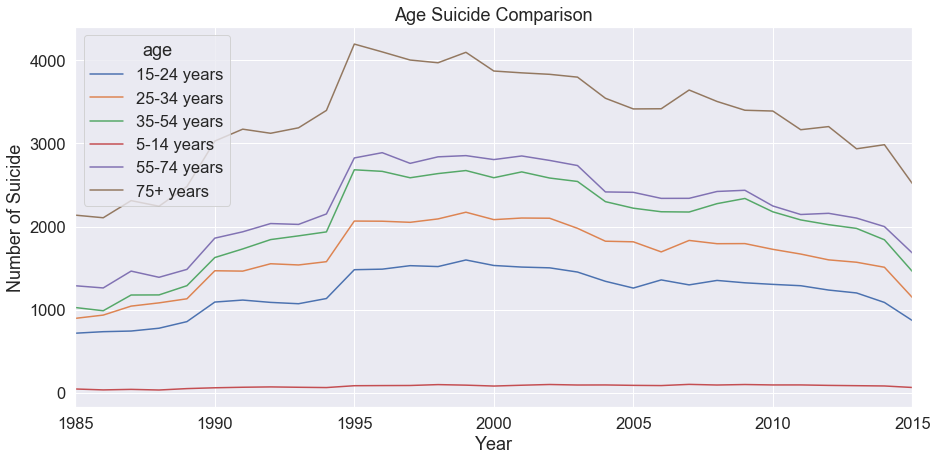

In [66]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = master_good.groupby(['year', 'age'])['suicides/100k pop'].sum().unstack().plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Suicide')
plt.title('Age Suicide Comparison')

Text(0.5, 1.0, 'Generation Suicide Comparison')

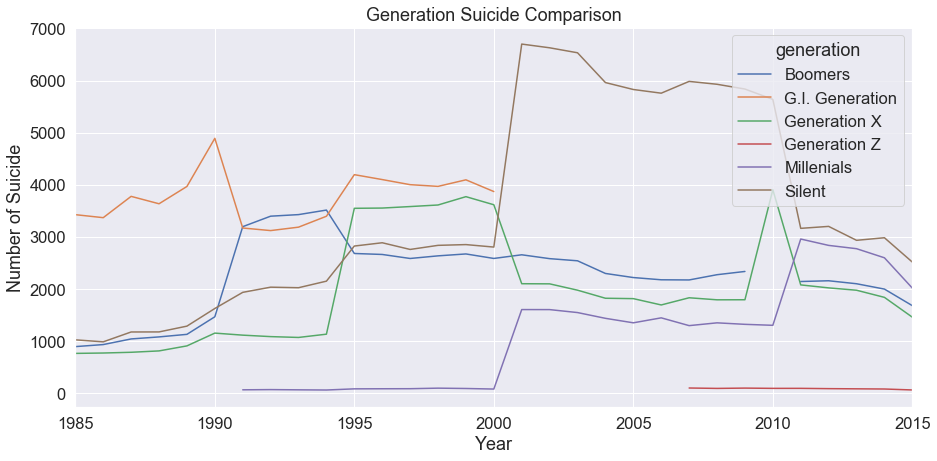

In [54]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = master_good.groupby(['year', 'generation'])['suicides/100k pop'].sum().unstack().plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Suicide')
plt.title('Generation Suicide Comparison')

Text(0.5, 1.0, 'Evolution of average sucide/100k of population by Generation')

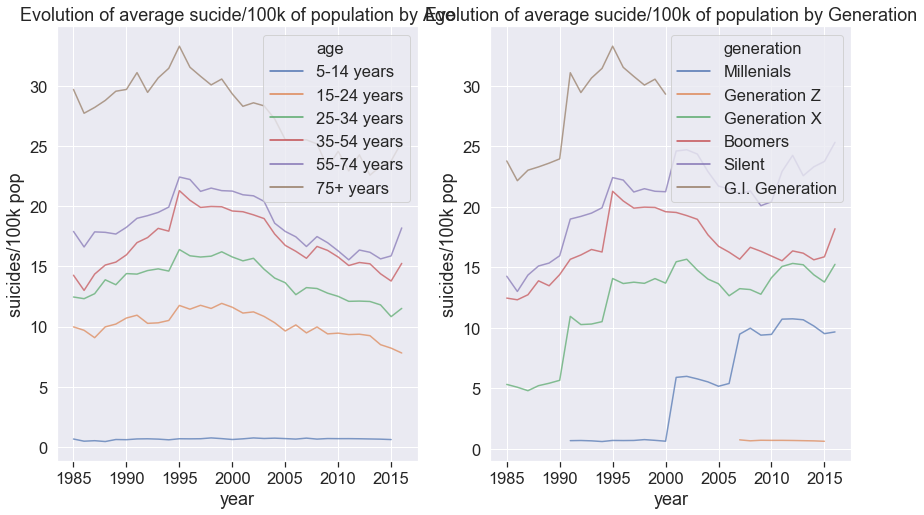

In [48]:
plt.figure(figsize=(22,8))
fig.subplots_adjust(hspace=.5)


plt.subplot(131)
sns.lineplot(x='year',y='suicides/100k pop', hue='age', data=by_Age_Time, alpha=0.7)
plt.gca().xaxis.tick_bottom()
plt.title('Evolution of average sucide/100k of population by Age')

plt.subplot(132)
sns.lineplot(x='year',y='suicides/100k pop', hue='generation', data=by_Gen_Time, alpha=0.7)
plt.gca().xaxis.tick_bottom()
plt.title('Evolution of average sucide/100k of population by Generation')

Text(0.5, 1.0, 'Suicides vs age per year')

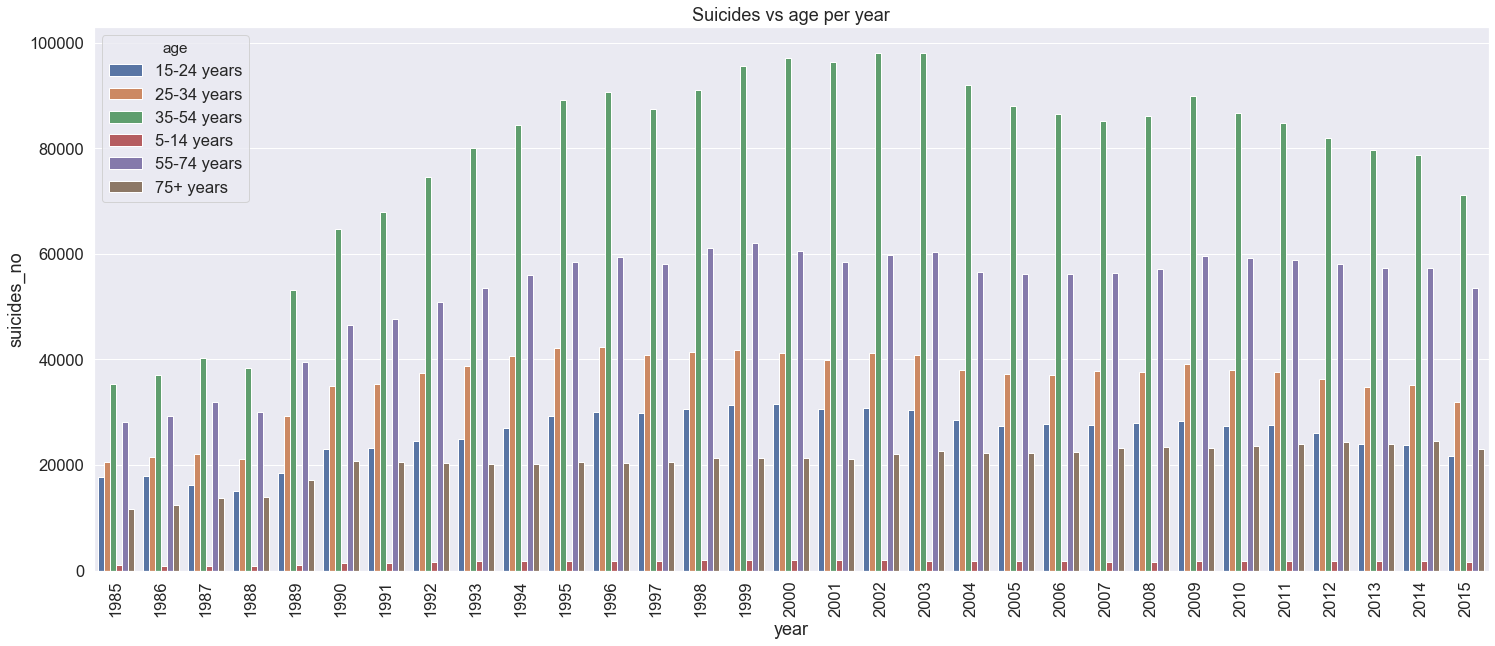

In [70]:
gen_age = master_good[['suicides_no','age','year']].groupby(['age','year']).sum().reset_index()
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
sns.barplot(y='suicides_no', x='year', hue='age', data=gen_age, palette='deep').set_title('Suicides vs age per year')

Text(0.5, 1.0, 'Suicides vs generations per year')

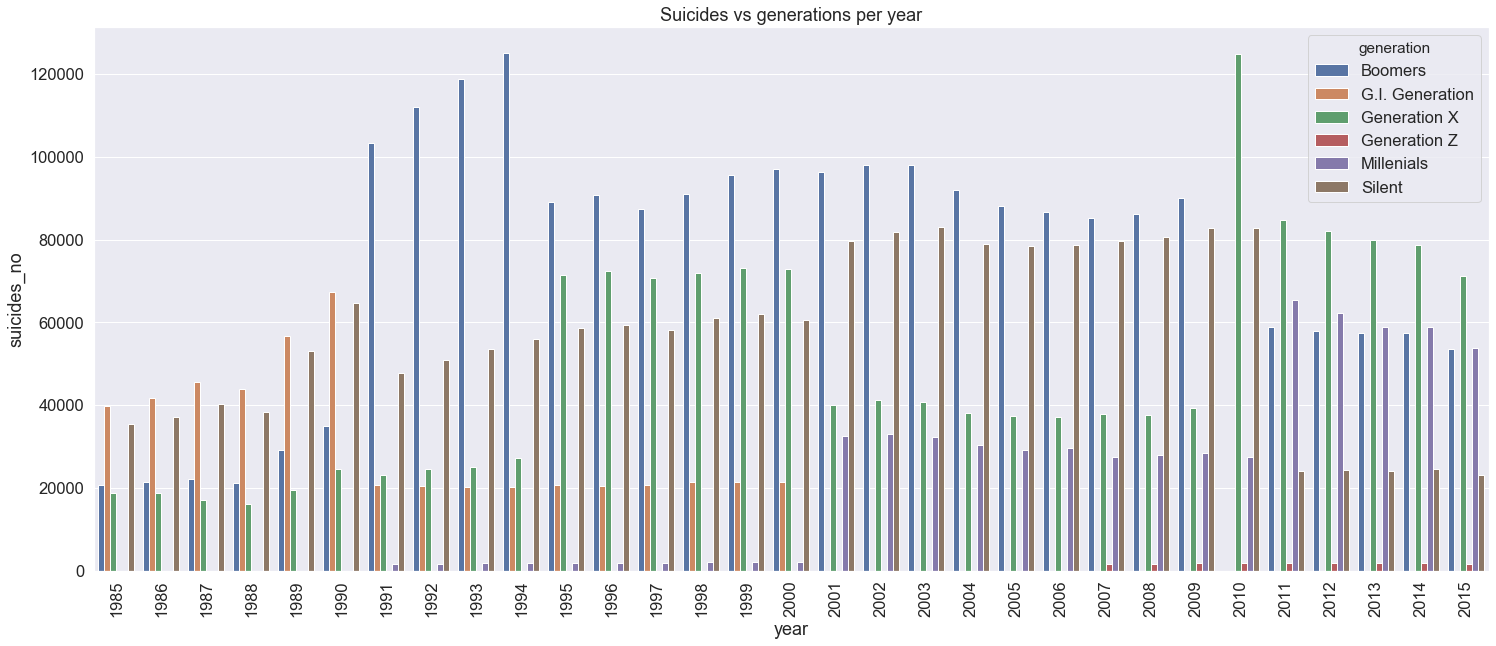

In [71]:
gen_year = master_good[['suicides_no','generation','year']].groupby(['generation','year']).sum().reset_index()
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=90)
sns.barplot(y='suicides_no', x='year', hue='generation', data=gen_year, palette='deep').set_title('Suicides vs generations per year')

Text(0.5, 1.0, 'Country Suicide Comparison')

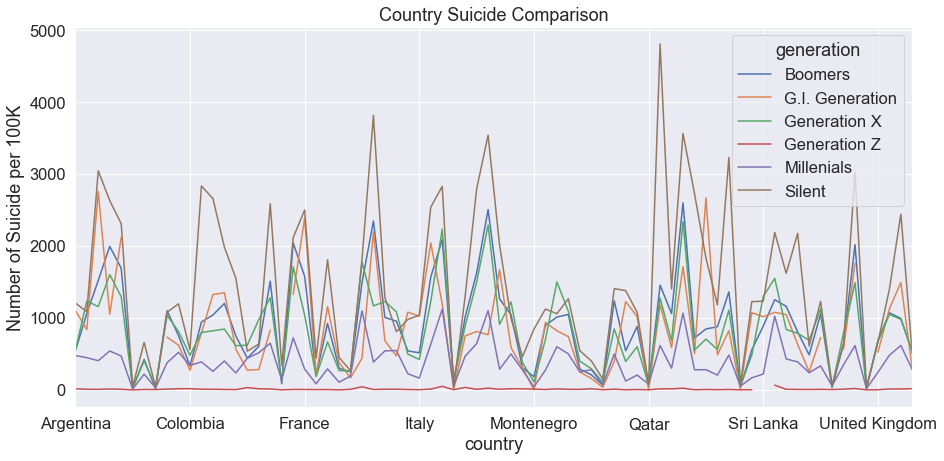

In [69]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = master_good.groupby(['country', 'generation'])['suicides/100k pop'].sum().unstack().plot(ax=ax)
plt.xlabel('country')
plt.ylabel('Number of Suicide per 100K')
plt.title('Country Suicide Comparison')

Text(0.5, 1.0, 'Country Suicide Comparison')

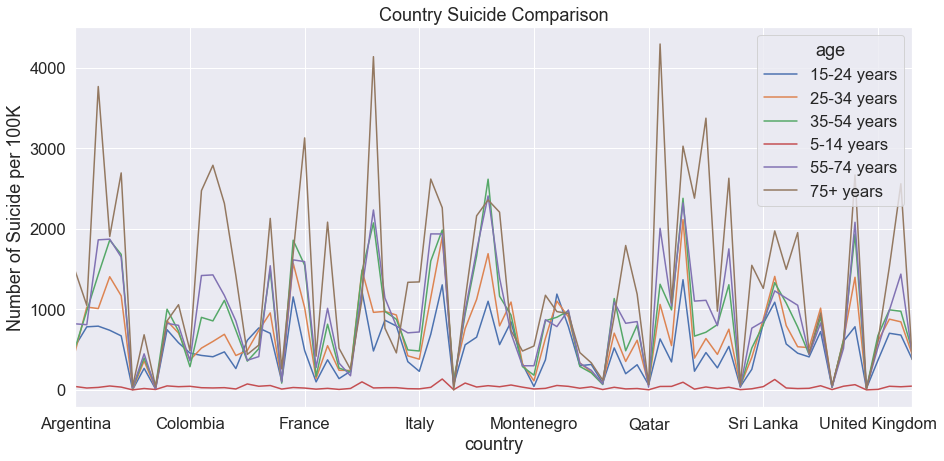

In [68]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = master_good.groupby(['country', 'age'])['suicides/100k pop'].sum().unstack().plot(ax=ax)
plt.xlabel('country')
plt.ylabel('Number of Suicide per 100K')
plt.title('Country Suicide Comparison')